In [2]:
# === 1.Importando bibliotecas ===
import pandas as pd
import numpy as np

In [15]:
# === Carregamento dos dados ===
users = pd.read_csv("users.csv")
posts = pd.read_csv("posts.csv")
interactions = pd.read_csv("interactions.csv")
destinations = pd.read_csv("destinations.csv")
agencies = pd.read_csv("agencies.csv")
gender = pd.read_csv("gender.csv")

In [5]:
# === 2.Inspeção inicial ===
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              500 non-null    object
 1   name                 500 non-null    object
 2   age                  500 non-null    int64 
 3   fk_gender_id         500 non-null    object
 4   country              500 non-null    object
 5   tourism_preferences  500 non-null    object
 6   registration_date    500 non-null    object
dtypes: int64(1), object(6)
memory usage: 27.5+ KB


In [6]:
posts.head()


,post_id,fk_user_id,post_type,title,content,hashtags,location,manual_label,likes,spam_flag,created_at
0,P8e651c3b,Uc804c343,cultural_info,My Travel Story,Visited a wonderful place!,#food,Morro do Moco,cultural_info,202,0,2023-11-03
1,P25557e4a,U770c60a8,feedback,Amazing Experience,Had an unforgettable adventure.,#culture,Quicama National Park,feedback,48,1,2023-04-15
2,P1b9936c4,U0db58acf,feedback,Amazing Experience,Visited a wonderful place!,#travel,Morro do Moco,feedback,101,1,2024-01-17
3,P75b3f5f6,U602e5341,recommendation,Cultural Insights,Visited a wonderful place!,#travel,Praia Morena,feedback,462,1,2023-05-12
4,P6aa4cd14,Uea0659d1,cultural_info,Amazing Experience,Visited a wonderful place!,#culture,Praia Morena,feedback,473,1,2024-02-09


In [7]:
posts.isnull().sum()

,0
post_id,0
fk_user_id,0
post_type,0
title,0
content,0
hashtags,0
location,0
manual_label,0
likes,0
spam_flag,0


In [16]:

# === 3.Tratamento de valores ausentes ===
users['fk_gender_id'].fillna(users['fk_gender_id'].mode()[0], inplace=True)
posts['post_type'].fillna("not_specified", inplace=True)
posts['rating'].fillna(posts['rating'].median(), inplace=True)
agencies['name'].fillna("Unknown Agency", inplace=True)

/tmp/ipython-input-3129657454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['fk_gender_id'].fillna(users['fk_gender_id'].mode()[0], inplace=True)
/tmp/ipython-input-3129657454.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [17]:
# === 4.Remoção de duplicados ===
users.drop_duplicates(subset=['username', 'email'], inplace=True)
posts.drop_duplicates(subset=['fk_user_id', 'content'], inplace=True)
interactions.drop_duplicates(subset=['fk_user_id', 'fk_post_id'], inplace=True)

In [18]:
# === 5.Padronização de formatos ===
users['username'] = users['username'].str.lower().str.strip()
posts['post_type'] = posts['post_type'].str.lower().str.replace(" ", "_")
posts['created_at'] = pd.to_datetime(posts['created_at'], errors='coerce')
gender['description'] = gender['description'].str.title()

In [19]:
# === 6.Tratamento de outliers ===
Q1 = posts['rating'].quantile(0.25)
Q3 = posts['rating'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

posts = posts[(posts['rating'] >= limite_inferior) & (posts['rating'] <= limite_superior)]

In [20]:
# === 7.Verificação de consistência relacional ===
valid_users = set(users['user_id'])
posts = posts[posts['fk_user_id'].isin(valid_users)]

valid_posts = set(posts['post_id'])
interactions = interactions[interactions['fk_post_id'].isin(valid_posts)]

In [26]:
interactions

,interaction_id,fk_user_id,fk_post_id,action,view_time
1,I52b08bef,U91da6ea1,Pdbd03750,save,16
2,I3f5d9bd4,U4442fbd1,P2cb75b3a,comment,220
3,I00958ad8,U39995463,P4b06f8e9,share,166
5,I7dd28dc6,U27887c59,P38872bd0,save,158
7,I8121ce03,U596c102d,P2b177a35,share,188
...,...,...,...,...,...
4991,I04b78ffd,U9cef64f7,Pf57f9677,save,271
4994,I9c07265a,U0391faa2,Pa13c7515,comment,189
4997,I11666e87,U20bdfc6f,P811ee0c2,share,29
4998,I849c4e05,Udd2a750c,P300d3c76,comment,125


In [28]:
# === 8.Análise Exploratória de Dados (EDA) ===
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# 9.Configurações visuais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

In [30]:
# === Estatísticas descritivas básicas ===
#--- Estatísticas descritivas das avaliações ---
posts['rating'].describe()

,rating
count,1251.000000
mean,2.955068
std,1.165050
min,1.020000
25%,1.920000
50%,2.980000
75%,3.945000
max,5.000000


In [31]:
#--- Contagem de tipos de post ---
posts['post_type'].value_counts()

,count
post_type,
travel_tip,336
recommendation,323
feedback,310
cultural_info,282


/tmp/ipython-input-2582278931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=posts, x='post_type', order=posts['post_type'].value_counts().index, palette='Set2')


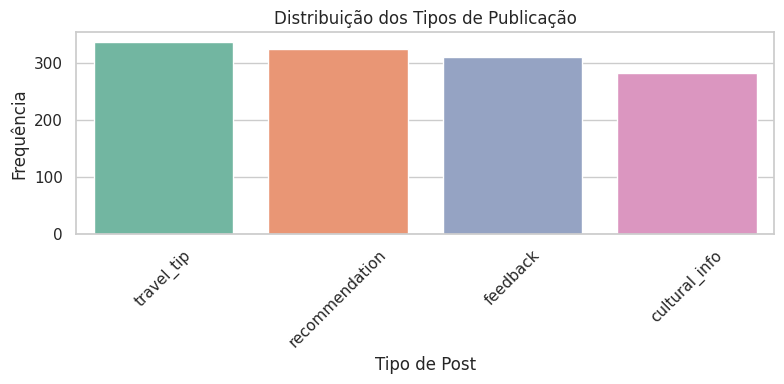

In [32]:
# === 8.2 Distribuição dos tipos de post ===
plt.figure(figsize=(8,4))
sns.countplot(data=posts, x='post_type', order=posts['post_type'].value_counts().index, palette='Set2')
plt.title("Distribuição dos Tipos de Publicação")
plt.xlabel("Tipo de Post")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

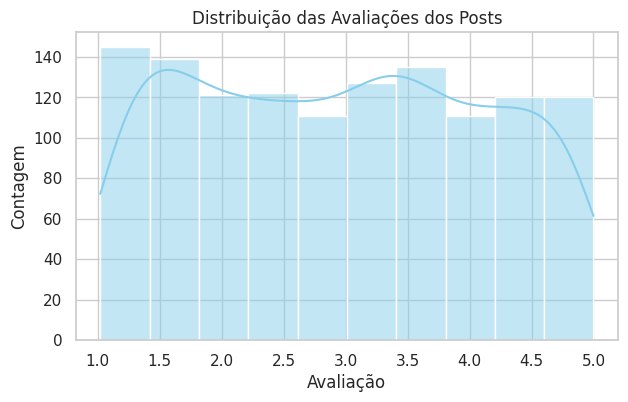

In [33]:
# === 8.3 Distribuição das avaliações ===
plt.figure(figsize=(7,4))
sns.histplot(posts['rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribuição das Avaliações dos Posts")
plt.xlabel("Avaliação")
plt.ylabel("Contagem")
plt.show()

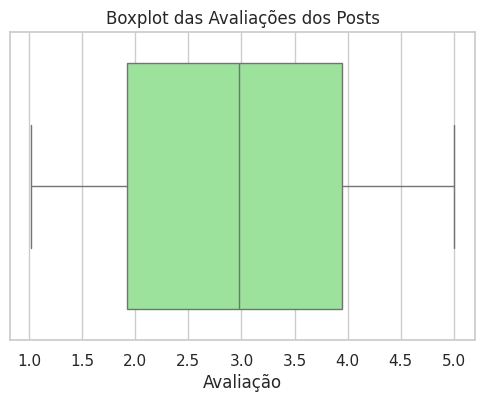

In [34]:
# === 8.4 Boxplot para detecção visual de outliers ===
plt.figure(figsize=(6,4))
sns.boxplot(x=posts['rating'], color='lightgreen')
plt.title("Boxplot das Avaliações dos Posts")
plt.xlabel("Avaliação")
plt.show()

/tmp/ipython-input-1618766596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='coolwarm')


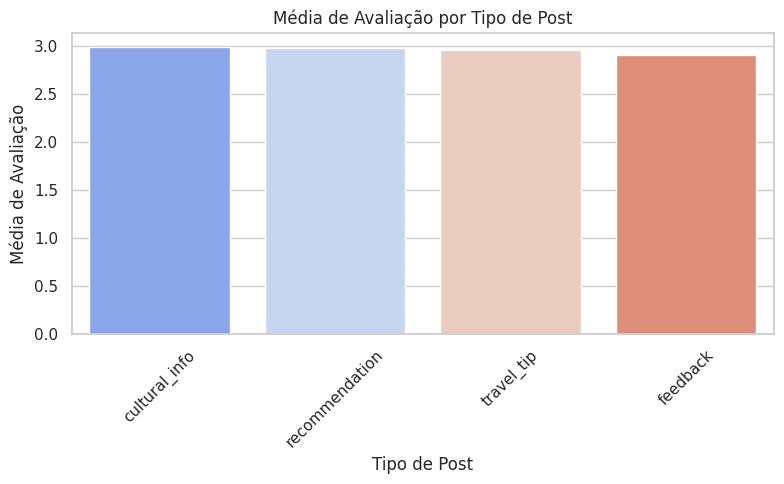

In [35]:
# === 8.5 Relação entre tipo de post e média de avaliação ===
avg_rating = posts.groupby('post_type')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='coolwarm')
plt.title("Média de Avaliação por Tipo de Post")
plt.xlabel("Tipo de Post")
plt.ylabel("Média de Avaliação")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1595212304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')


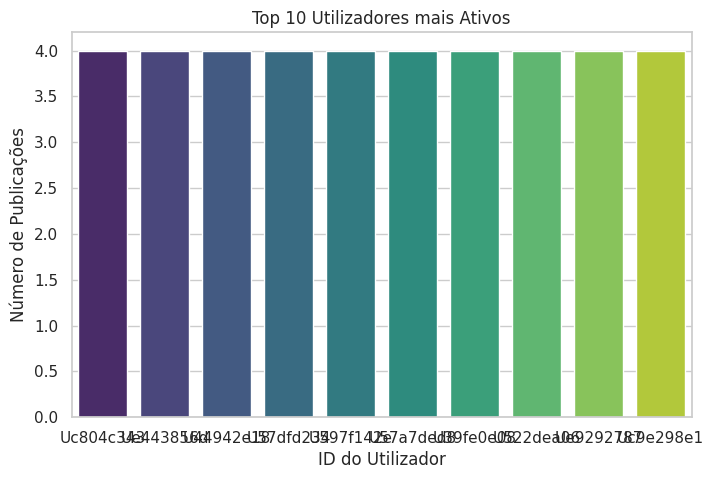

In [36]:
# === 8.6 Top 10 utilizadores mais ativos ===
top_users = posts['fk_user_id'].value_counts().head(10)
sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')
plt.title("Top 10 Utilizadores mais Ativos")
plt.xlabel("ID do Utilizador")
plt.ylabel("Número de Publicações")
plt.show()

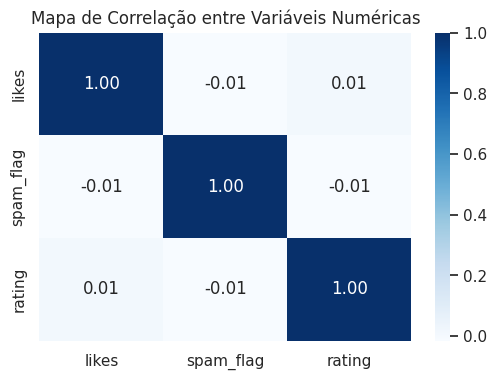

In [37]:
# === 8.7 Correlação entre variáveis numéricas ===
numeric_cols = posts.select_dtypes(include=np.number)
corr = numeric_cols.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()

In [38]:
#Codificação de variáveis categóricas
posts = pd.get_dummies(posts, columns=['post_type'], drop_first=True)
users = pd.get_dummies(users, columns=['fk_gender_id'], drop_first=True)


In [39]:
#Extração de características temporais
posts['created_at'] = pd.to_datetime(posts['created_at'])
posts['post_hour'] = posts['created_at'].dt.hour
posts['post_day'] = posts['created_at'].dt.day_name()
posts['post_month'] = posts['created_at'].dt.month


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['rating', 'post_length', 'post_hour', 'post_month']
posts[numeric_features] = scaler.fit_transform(posts[numeric_features])


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecionar colunas numéricas + criar dummies para categóricas
X = posts.drop(columns=['post_id', 'fk_user_id', 'content', 'created_at', 'rating'])
X = pd.get_dummies(X, drop_first=True)  # converte strings em 0/1

y = posts['rating']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predição e métricas
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# Importância das features
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))



Mean Squared Error: 1.082
R² Score: -0.051
likes                      0.273887
post_month                 0.119088
post_length                0.067622
hashtags_#beach            0.025580
post_day_Thursday          0.024004
title_My Travel Story      0.023454
manual_label_travel_tip    0.022977
spam_flag                  0.022643
post_type_travel_tip       0.022461
post_type_feedback         0.022009
dtype: float64
